# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

## -----> Addendum alla V2

A eccezione del feature scaling, dove la modifica è stata apportata direttamente nel box pre esistente, sono stati creati dei capitoli ad hoc per quanto riguarda le modifiche su:

1. Linear Regression;
2. Polynomial Regression.

Questi capitoli prendono il nome di "Versione X del codice" dove la X indica il tipo di tentativi posti. Chiaramente la Versione 1 è quella già corretta. <br>

Sfortuntamente, nonostante numerosi tentativi e metodologie applicate, non sono riuscito a rendere positivo l'R2, tuttavia sono migliorati MSE e MAE. <br>

Va fatto notare che nei tentativi dove ho scalato tutto il dataset, chiaramente il miglioramento può essere dovuto anche al cambio di scala (anzi, molto probabilmente è principalmente per quello). <br>

Parallelamente ho realizzato anche un notebook di test dove ho portato avanti anche altri tentativi come la rimozione di outliers sia con metodi univariati che multivariati sui dataset di train che, però, non hanno sortito l'effetto sperato (MSE e MAE rimanevano comunque nell'intorno dei risultati ottenuti senza adoperare questa parte di data cleaning). <br>

Ho tentato anche delle soluzioni di riduzione della dimensionalità con tecniche quali la PCA sulle variabili continue o rimuovendo eventuali variabili categoriche non utili (a esempio se ho l'informazione di genere nella variabile Male rimuovo la variabile Female in quanto è sicuramente correlata alla perfezione). Neanche queste soluzioni hanno sortito l'effetto sperato. <br>

In [ ]:
# Import delle principali librerie

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [ ]:
# Import delle librerie per montare il drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [ ]:
# Importazione del dataset 'supermarket sales'

regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/02_Formazione/2021-2024_Start2Impact/2022-2024_Data-Analysis'
                                     '/Advanced-Analytics-EXTRA/Dataset/supermarket_sales.csv', encoding='windows-1254')

# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [ ]:
# Stampo dei primi 100 record

regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [ ]:
# Stampo delle informazioni relative al dataset

regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [ ]:
# Eliminazione delle colonne non utili al fine del progetto

regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [ ]:
# Stampo delle informazioni principali del nuovo dataset

regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. La colonna "Rating" dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [ ]:
# codice per calcolare la media, mediana e moda della label "Rating"
# Per i valori di media e mediana numpy fornisce il metodo mean e median

media_rating = np.mean(regression_dataset['Rating'])
mediana_rating = np.median(regression_dataset['Rating'])

# Per quanto riguarda la moda numpy non fornisce direttamente un metodo per calcolarla
# Tuttavia, è possibile sfruttare altre funzioni per ricostruirla.
# Me ne vengono in mente 2:

# A) O passare il risultato del metodo np.unique che ha i conteggi
# dei valori di rating e poi utilizzare questa lista di valori con np.argmax per individuare
# quale valore ha il conteggio più alto (dunque, moda)

# B) O sfruttare il metodo np.bincount che permette di contare i bin, passandolo
# sempre a np.argmax per recuperare il bin con il valore più elevato (dunque, moda).
# Protendo per la seconda, visto che mi sembra di più rapida implementazione.

moda_rating = np.argmax(np.bincount(regression_dataset['Rating']))

print(f'La variabile Rating ha:\n\n'
      f'Media: {media_rating};\n'
      f'Mediana: {mediana_rating};\n'
      f'Moda: {moda_rating}')

La variabile Rating ha:

Media: 6.9727;
Mediana: 7.0;
Moda: 6


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [ ]:
# codice per calcolare la deviazione standard della label "Rating"
# Numpy fornisce il metodo std per il calcolo della deviazione standard.

devstd_rating = np.std(regression_dataset['Rating'])

print(f'La deviazione standard della variabile Rating è: {devstd_rating}')

La deviazione standard della variabile Rating è: 1.7177207893019169


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

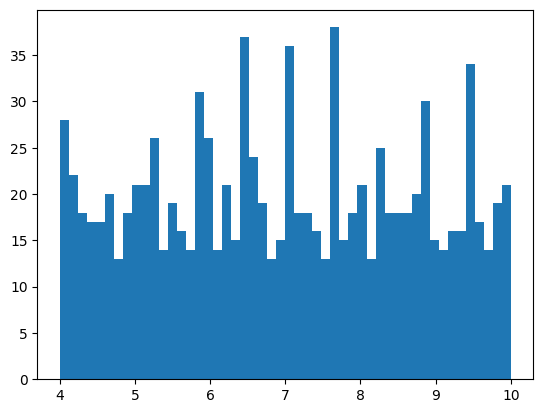

In [ ]:
# Stampo dell'istogramma con 50 bins

plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

Il discorso è invece diverso per l'utile lordo:

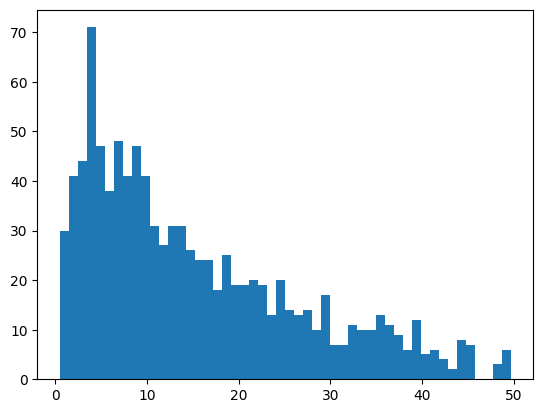

In [ ]:
# Stampo dell'istogramma della variabile 'gross income'

plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [ ]:
# Codice per calcolare la skewness del gross income
# Per rispondere a questo quesito vedo 1 principale possibilità:

# Usando il metodo skew messo a disposizione da Pandas o da
# Scipy (funzione che, però, non abbiamo importato).

gross_income_skewness = regression_dataset['gross income'].skew()

print(f'La skewness dell\'incasso lordo è {gross_income_skewness}')

# Ciclo if per definire l'asimmetria o meno della nostra variabile,
# avrei potuto individuare dei range di simmetria (simmetrica, moderatamente-sim,
# moderatamente asim, asimmetrica) ma non essendo strettamente
# necessario mi limito a un if/else.

if gross_income_skewness == 0:
  print('La distribuzione è simmetrica.')
else:
  print('La distribuzione è asimmetrica.')

La skewness dell'incasso lordo è 0.8925698049581423
La distribuzione è asimmetrica.


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [ ]:
# codice per effettuare l'enconding delle variabili categoriche
# Procedo all'hot encoding tramite il metodo get_dummies di Pandas,
# ricordo che occorre specificare l'argomento dtype=int per ottenere
# un encoding numerico e non booleano.

regression_dataset_encoded = pd.get_dummies(regression_dataset, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype=int)

# Stampo di un sample randomico

regression_dataset_encoded.sample(10)

,Unit price,Quantity,gross income,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
399,19.24,9,8.6580,8.0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
338,47.65,3,7.1475,9.5,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
263,22.24,10,11.1200,4.2,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
421,84.05,3,12.6075,9.8,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
868,24.31,3,3.6465,4.3,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
676,64.08,7,22.4280,7.3,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
151,34.56,7,12.0960,7.3,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
248,77.72,4,15.5440,8.8,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
401,46.22,4,9.2440,6.2,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
422,97.21,10,48.6050,8.7,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [ ]:
# codice per effettuare la standardizzazione della colonna "Unit price" e "gross income"

###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Procedo utilizzando lo StandardScaler anziché Pandas

# Importo la libreria utile

from sklearn.preprocessing import StandardScaler

# Applico lo StandardScaler
# Rispetto alla versione 1 lo applico anche sulla variabile quantity

regression_dataset_encoded[['Unit price_scaled','gross income_scaled']] = StandardScaler().fit_transform(regression_dataset_encoded[['Unit price','gross income']])

# Elimino le colonne originali dal dataset

regression_dataset_encoded = regression_dataset_encoded.drop(columns=['Unit price','gross income'])

# Stampo un sample randomico

regression_dataset_encoded.sample(10)

,Quantity,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,...,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Unit price_scaled,gross income_scaled
409,5,5.4,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,-1.202812,-0.805297
247,5,6.8,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,-1.424855,-0.930906
566,10,9.4,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,-0.239494,0.793442
860,1,7.0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1.155449,-0.945561
667,4,6.4,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,-1.423722,-1.007041
352,7,8.5,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,-0.035577,0.322664
622,7,4.9,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1.469632,1.514755
831,4,9.5,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0.260480,-0.244841
652,10,7.3,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0.646034,1.795325
417,1,9.2,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0.975700,-0.965897


In [ ]:
# Stampo delle informazioni del dataset

regression_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Quantity                             1000 non-null   int64  
 1   Rating                               1000 non-null   float64
 2   Branch_A                             1000 non-null   int64  
 3   Branch_B                             1000 non-null   int64  
 4   Branch_C                             1000 non-null   int64  
 5   City_Mandalay                        1000 non-null   int64  
 6   City_Naypyitaw                       1000 non-null   int64  
 7   City_Yangon                          1000 non-null   int64  
 8   Customer type_Member                 1000 non-null   int64  
 9   Customer type_Normal                 1000 non-null   int64  
 10  Gender_Female                        1000 non-null   int64  
 11  Gender_Male                    

# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [ ]:
from sklearn.model_selection import train_test_split

# codice per splittare il dataset in training set e test set
# Utilizzo la funzione train_test_split per separare in 2 dataset il dataset originario
# con una ratio di 80:20 e il consueto random state impostato su 42.

X = regression_dataset_encoded.drop(columns=['Rating'])
y = regression_dataset_encoded['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Controllo del dataset

X_train.sample(5)

,Quantity,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,...,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Unit price_scaled,gross income_scaled
648,2,0,0,1,0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,-1.517373,-1.181783
455,5,0,1,0,1,0,0,1,0,1,...,1,0,0,0,0,1,0,0,-0.986056,-0.682679
46,9,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0.038437,0.865689
167,10,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1.635408,2.914699
798,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1.401282,-0.917747


In [ ]:
y_train.sample(5)

,Rating
339,8.9
730,4.4
150,4.8
378,9.4
759,8.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Quantity                             800 non-null    int64  
 1   Branch_A                             800 non-null    int64  
 2   Branch_B                             800 non-null    int64  
 3   Branch_C                             800 non-null    int64  
 4   City_Mandalay                        800 non-null    int64  
 5   City_Naypyitaw                       800 non-null    int64  
 6   City_Yangon                          800 non-null    int64  
 7   Customer type_Member                 800 non-null    int64  
 8   Customer type_Normal                 800 non-null    int64  
 9   Gender_Female                        800 non-null    int64  
 10  Gender_Male                          800 non-null    int64  
 11  Product line_Electronic accessories 

# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

## Versione 1 del codice

In [ ]:
# training del modello con la linear regression
# Importazione delle librerie necessarie per procedere all'applicazione della
# regressione lineare.

from sklearn.linear_model import LinearRegression

# Richiamo il modello

regressor = LinearRegression()

# Applico il modello

regressor.fit(X_train, y_train)

LinearRegression()

Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [ ]:
# Richiamo i valori di MSE e MAE dal modello

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Effettuo la predizione usando i dati di test

y_prediction = regressor.predict(X_test)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test, y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.110187291026072 
MAE = 1.5229214208487527


In [ ]:
# Verifico la varianza spiegata dal modello

from sklearn.metrics import r2_score

linear_r2_score = regressor.score(X_test, y_test)

print('R2 della linear regression:', linear_r2_score)

R2 della linear regression: -0.01381683650370702


## Versione 2 del codice

In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

X_train_v2 = X_train.copy()
X_test_v2 = X_test.copy()
y_train_v2 = y_train.copy()
y_test_v2 = y_test.copy()

# Strandardizzo i dati definendo 2 scaler differenti in modo
# da non contaminare i dati

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Provo a scalare anche la feature quantity e il target rating

X_train_v2['qnty_scaled'] = scaler_X.fit_transform(X_train_v2[['Quantity']])
X_test_v2['qnty_scaled'] = scaler_X.transform(X_test_v2[['Quantity']])

X_train_v2 = X_train_v2.drop(columns=['Quantity'])
X_test_v2 = X_test_v2.drop(columns=['Quantity'])

y_train_v2 = scaler_y.fit_transform(y_train_v2.values.reshape(-1, 1))
y_test_v2 = scaler_y.transform(y_test_v2.values.reshape(-1, 1))

# Richiamo il modello

regressor_v2 = LinearRegression()

# Applico il modello

regressor_v2.fit(X_train_v2, y_train_v2)

# Effettuo la predizione usando i dati di test

y_prediction_v2 = regressor_v2.predict(X_test_v2)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test_v2, y_prediction_v2)
MAE = mean_absolute_error(y_test_v2, y_prediction_v2)

# Calcolo l'r2

linear_r2_score_v2 = regressor_v2.score(X_test_v2, y_test_v2)

print('MSE =', MSE, '\nMAE =', MAE)
print('R2 della linear regression:', linear_r2_score_v2)

MSE = 1.052748718076965 
MAE = 0.8879332546719031
R2 della linear regression: -0.0017270923574366215


In [ ]:
# Attraverso lo scaling della variabile quantity e della variabile target
# sono riuscito a ridurre sia l'MSE che i MAE, migliorando l'R2.
# Tuttavia, non sono riuscito a rendere positivo l'R2.

# Provo ad aggiungere una regolarizzazione per vedere se riesco a
# migliorare l'esito delle performance.

In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Provo a introdurre una regolarizzazione della regressione lineare
# Importo le librerie

from sklearn.linear_model import Lasso, Ridge

# Importo il modello

lasso = Lasso()

# Introduco una griglia di parametri per l'alpha e le iterazioni

param_grid_lasso = {
    'alpha' : np.logspace(-4, 4, 50),
    'max_iter' : [1000]
}

# Importo una griglia GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definisco la griglia passando come scoring l'r2

grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2')

# Addestro il modello

grid_search_lasso.fit(X_train_v2, y_train_v2)

# Scelgo il modello migliore

best_model_lasso = grid_search_lasso.best_estimator_

# Effettuo la predizione

y_prediction_lasso = best_model_lasso.predict(X_test_v2)

# Calcolo l'MSE, il MAE e l'R2

MSE = mean_squared_error(y_test_v2, y_prediction_lasso)
MAE = mean_absolute_error(y_test_v2, y_prediction_lasso)
lasso_r2_score = best_model_lasso.score(X_test_v2, y_test_v2)

# Stampo

print('MSE =', MSE, '\nMAE =', MAE)
print('R2 della lasso regression:', lasso_r2_score)

MSE = 1.0545944864104446 
MAE = 0.8877747876355535
R2 della lasso regression: -0.0034834052496901524


In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Importo il modello

ridge = Ridge()

# Introduco una griglia di parametri per l'alpha e le iterazioni

param_grid_ridge = {
    'alpha' : np.logspace(-4, 4, 50),
    'max_iter' : [1000]
}

# Importo una griglia GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definisco la griglia passando come scoring l'r2

grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')

# Addestro il modello

grid_search_ridge.fit(X_train_v2, y_train_v2)

# Scelgo il modello migliore

best_model_ridge = grid_search_ridge.best_estimator_

# Effettuo la predizione

y_prediction_ridge = best_model_ridge.predict(X_test_v2)

# Calcolo l'MSE, il MAE e l'R2

MSE = mean_squared_error(y_test_v2, y_prediction_ridge)
MAE = mean_absolute_error(y_test_v2, y_prediction_ridge)
ridge_r2_score = best_model_ridge.score(X_test_v2, y_test_v2)

# Stampo

print('MSE =', MSE, '\nMAE =', MAE)
print('R2 della ridge regression:', ridge_r2_score)

MSE = 1.0548336501976368 
MAE = 0.8882311947483607
R2 della ridge regression: -0.0037109779277921806


In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Provo a combinare le due regolarizzazioni
# Importo le librerie

from sklearn.linear_model import ElasticNet

# Importo il modello

elasticnet = ElasticNet()

# Introduco una griglia di parametri per l'alpha e le iterazioni

param_grid_elasticnet = {
    'alpha' : np.logspace(-4, 4, 50),
    'l1_ratio' : np.linspace(0.1, 0.9, 5),
    'max_iter' : [5000]
}

# Importo una griglia GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definisco la griglia passando come scoring l'r2

grid_search_elasticnet = GridSearchCV(elasticnet, param_grid_elasticnet, cv=5, scoring='r2')

# Addestro il modello

grid_search_elasticnet.fit(X_train_v2, y_train_v2)

# Scelgo il modello migliore

best_model_elasticnet = grid_search_elasticnet.best_estimator_

# Effettuo la predizione

y_prediction_elasticnet = best_model_elasticnet.predict(X_test_v2)

# Calcolo l'MSE, il MAE e l'R2

MSE = mean_squared_error(y_test_v2, y_prediction_elasticnet)
MAE = mean_absolute_error(y_test_v2, y_prediction_elasticnet)
elasticnet_r2_score = best_model_elasticnet.score(X_test_v2, y_test_v2)

# Stampo

print('MSE =', MSE, '\nMAE =', MAE)
print('R2 della elasticnet regression:', elasticnet_r2_score)

MSE = 1.0545944864104446 
MAE = 0.8877747876355535
R2 della elasticnet regression: -0.0034834052496901524


In [ ]:
# Sfortunatamente la regolarizzazione ha peggiorato le performance del modello.
# Tra le tre testate, la Lasso sembra essere la più idonea in quanto la ElasticNet
# Collassa sulla regolarizzazione Lasso.

# Ho il dubbio che il problema, più che nella configurazione del modello
# sia nei dati. Proverò dunque a ridurre la dimensionalità delle variabili
# dummies.

In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Dataset ristretto

X_train_filtered = X_train_v2.drop(columns=['Branch_C','City_Yangon','Customer type_Normal','Gender_Male','Product line_Sports and travel','Payment_Ewallet']).copy()
X_test_filtered = X_test_v2.drop(columns=['Branch_C','City_Yangon','Customer type_Normal','Gender_Male','Product line_Sports and travel','Payment_Ewallet']).copy()

# Richiamo il modello

regressor_v4 = LinearRegression()

# Applico il modello

regressor_v4.fit(X_train_filtered, y_train_v2)

# Effettuo la predizione usando i dati di test

y_prediction_def = regressor_v4.predict(X_test_filtered)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test_v2, y_prediction_def)
MAE = mean_absolute_error(y_test_v2, y_prediction_def)

# Calcolo l'r2

linear_r2_score_v2 = regressor_v4.score(X_test_filtered, y_test_v2)

print('MSE =', MSE, '\nMAE =', MAE)
print('R2 della linear regression:', linear_r2_score_v2)

MSE = 1.069998716102248 
MAE = 0.8935670901065214
R2 della linear regression: -0.018141066621497393


In [ ]:
# Provo a restringere ulteriormente il dataset escludendo le variabili che
# vanno a comporre la variabile continua gross income_scaled
# Dataset ristretto 2

X_train_filtered_2 = X_train_v2.drop(columns=['Branch_C','City_Yangon','Customer type_Normal','Gender_Male','Product line_Sports and travel','Payment_Ewallet','Unit price_scaled','qnty_scaled']).copy()
X_test_filtered_2 = X_test_v2.drop(columns=['Branch_C','City_Yangon','Customer type_Normal','Gender_Male','Product line_Sports and travel','Payment_Ewallet','Unit price_scaled','qnty_scaled']).copy()

# Richiamo il modello

regressor_v5 = LinearRegression()

# Applico il modello

regressor_v5.fit(X_train_filtered_2, y_train_v2)

# Effettuo la predizione usando i dati di test

y_prediction_def = regressor_v5.predict(X_test_filtered_2)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test_v2, y_prediction_def)
MAE = mean_absolute_error(y_test_v2, y_prediction_def)

# Calcolo l'r2

linear_r2_score_v2 = regressor_v5.score(X_test_filtered_2, y_test_v2)

print('MSE =', MSE, '\nMAE =', MAE)
print('R2 della linear regression:', linear_r2_score_v2)

MSE = 1.076193220149316 
MAE = 0.8984245583536399
R2 della linear regression: -0.02403535309377247


In [ ]:
# Operando delle trasformazioni di riduzione sul dataset le performance
# non sono migliorate, bensì peggiorate.
# La riduzione della dimensionalità non è dunque una soluzione perseguibile.

# Ho testato separatamente anche la possibilità di ridurre la dimensionalità
# attraverso una PCA, tuttavia la correlazione perfetta che c'è tra le varie
# componenti porta all'emersione di valori NaN.

## Versione 3 del codice

In [ ]:
# Provo ad applicare il train test prima di scalare i dati

regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
# Eseguo nuovamente l'encoding delle variabili

regression_dataset_encoded_2 = pd.get_dummies(regression_dataset, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype=int)

# Stampo di un sample randomico
regression_dataset_encoded_2.sample(10)

,Unit price,Quantity,gross income,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
416,45.38,4,9.0760,8.7,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
795,27.18,2,2.7180,4.3,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
8,36.26,2,3.6260,7.2,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
224,43.25,2,4.3250,6.2,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
936,78.89,7,27.6115,7.5,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
449,39.12,1,1.9560,9.6,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
207,28.53,10,14.2650,7.8,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
689,67.10,3,10.0650,7.5,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
672,73.41,3,11.0115,4.0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
841,60.30,1,3.0150,6.0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
# Eseguo prima lo split train test

X_new = regression_dataset_encoded_2.drop(columns=['Rating'])
y_new = regression_dataset_encoded_2['Rating']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
# Eseguo lo scaling delle variabili

X_scaler_new = StandardScaler()
y_scaler_new = StandardScaler()

X_train_new_scaled = X_scaler_new.fit_transform(X_train_new[['Quantity','gross income','Unit price']])
X_test_new_scaled = X_scaler_new.transform(X_test_new[['Quantity','gross income','Unit price']])

labels_new = ['qnty_scaled','grss_scaled','unitp_scaled']

X_train_new_scaled = pd.DataFrame(X_train_new_scaled, columns=labels_new, index=X_train_new.index)
X_test_new_scaled = pd.DataFrame(X_test_new_scaled, columns=labels_new, index=X_test_new.index)

X_train_new_scaled = pd.concat([X_train_new.drop(columns=['Quantity','gross income','Unit price']), X_train_new_scaled], axis=1)
X_test_new_scaled = pd.concat([X_test_new.drop(columns=['Quantity','gross income','Unit price']), X_test_new_scaled], axis=1)

y_train_new_scaled = y_scaler_new.fit_transform(y_train_new.values.reshape(-1, 1))
y_test_new_scaled = y_scaler_new.transform(y_test_new.values.reshape(-1, 1))

In [ ]:
# Richiamo il modello

regressor_v5 = LinearRegression()

# Applico il modello

regressor_v5.fit(X_train_new_scaled, y_train_v2)

# Effettuo la predizione usando i dati di test

y_prediction_v2 = regressor_v5.predict(X_test_new_scaled)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test_v2, y_prediction_v2)
MAE = mean_absolute_error(y_test_v2, y_prediction_v2)

# Calcolo l'r2

linear_r2_score_v2 = regressor_v5.score(X_test_new_scaled, y_test_v2)

print('MSE =', MSE, '\nMAE =', MAE)
print('R2 della linear regression:', linear_r2_score_v2)

MSE = 1.0635092430123236 
MAE = 0.8909596682315214
R2 della linear regression: -0.011966106825605838


In [ ]:
# Neanche scalando dopo il dataset riesco a rendere l'R2 positivo.

# Polynomial Regression (Versione 2 del codice)

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

## Versione 1 del codice

In [ ]:
# training del modello con la polynomial regression
# Richiamo PolynomialFeatures dalla libreria scikit-learn

from sklearn.preprocessing import PolynomialFeatures

# Definisco l'oggetto relativo alle feature polinomiali

poly_regressor = PolynomialFeatures(degree=2, include_bias=False)

# Richiamo il modello

regressor = LinearRegression()

# Applico la trasformazione polinomiale

X_train_poly = poly_regressor.fit_transform(X_train)
X_test_poly = poly_regressor.fit_transform(X_test)

# Addestro nuovamente il modello

regressor.fit(X_train_poly, y_train)

###########################################################################

# Effettuo la predizione usando i dati di test

y_prediction_poly = regressor.predict(X_test_poly)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test, y_prediction_poly)
MAE = mean_absolute_error(y_test, y_prediction_poly)

print('MSE =', MSE, '\nMAE =', MAE)

###########################################################################

# MSE e MAE aumentano

poly_r2_score = regressor.score(X_test_poly, y_test)

print('R2 della polynomial regression:', poly_r2_score)

## Versione 2 del codice

In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Modifiche fatte: nella versione precedente avevo applicato la
# trasformazione polinomiale anche alle variabili dummy.
# Ho dunque applicato la trasformazione solo alle variabili continue.
# Inoltre, avevo applicato fit_trasform sia sull'X train che
# sull'X test, ho corretto utilizzando solo il transform sull'X test.
# Lascio in fondo il vecchio codice.

###############################################################################

# training del modello con la polynomial regression
# Richiamo PolynomialFeatures dalla libreria scikit-learn

from sklearn.preprocessing import PolynomialFeatures

# Definisco l'oggetto relativo alle feature polinomiali

poly_regressor = PolynomialFeatures(degree=2, include_bias=False)

# Richiamo il modello

regressor = LinearRegression()

# Definisco le features del modello su cui applicare la trasformazione

features = ['Unit price_scaled','gross income_scaled','qnty_scaled']

# Applico la trasformazione polinomiale

X_train_poly = poly_regressor.fit_transform(X_train_v2[features])
X_test_poly = poly_regressor.transform(X_test_v2[features])

# Recupero le etichette

label = poly_regressor.get_feature_names_out(features)

# Aggiungo le etichette

X_train_poly = pd.DataFrame(X_train_poly, columns=label, index=X_train_v2.index)
X_test_poly = pd.DataFrame(X_test_poly, columns=label, index=X_test_v2.index)

# Concateno il dataset con le feature polinomiali al dataset originario

X_train_final = pd.concat([X_train_v2.drop(columns=features), X_train_poly.drop(columns=features)], axis=1)
X_test_final = pd.concat([X_test_v2.drop(columns=features), X_test_poly.drop(columns=features)], axis=1)

# Addestro il modello

regressor.fit(X_train_final, y_train_v2)

LinearRegression()

Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Effettuo la predizione usando i dati di test

y_prediction_poly = regressor.predict(X_test_final)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test_v2, y_prediction_poly)
MAE = mean_absolute_error(y_test_v2, y_prediction_poly)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 1.0628133258120673 
MAE = 0.8848128984091679


In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Calcolo l'r2

poly_r2_score = regressor.score(X_test_final, y_test_v2)

print('R2 della polynomial regression:', poly_r2_score)

R2 della polynomial regression: -0.011303917357631255


In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Definisco l'oggetto relativo alle feature polinomiali

poly_regressor_3 = PolynomialFeatures(degree=3, include_bias=False)

# Richiamo il modello

regressor = LinearRegression()

# Definisco le features del modello su cui applicare la trasformazione

features = ['Unit price_scaled','gross income_scaled','qnty_scaled']

# Applico la trasformazione polinomiale

X_train_poly_3 = poly_regressor_3.fit_transform(X_train_v2[features])
X_test_poly_3 = poly_regressor_3.transform(X_test_v2[features])

# Recupero le etichette

label = poly_regressor_3.get_feature_names_out(features)

# Aggiungo le etichette

X_train_poly_3 = pd.DataFrame(X_train_poly_3, columns=label, index=X_train_v2.index)
X_test_poly_3 = pd.DataFrame(X_test_poly_3, columns=label, index=X_test_v2.index)

# Concateno il dataset con le feature polinomiali al dataset originario

X_train_final = pd.concat([X_train_v2.drop(columns=features), X_train_poly_3.drop(columns=features)], axis=1)
X_test_final = pd.concat([X_test_v2.drop(columns=features), X_test_poly_3.drop(columns=features)], axis=1)

# Addestro il modello

regressor.fit(X_train_final, y_train_v2)

LinearRegression()

In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Effettuo la predizione usando i dati di test

y_prediction_poly = regressor.predict(X_test_final)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_test_v2, y_prediction_poly)
MAE = mean_absolute_error(y_test_v2, y_prediction_poly)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 1.0836215410716186 
MAE = 0.8913077978879523


In [ ]:
###############################################################################
############################ Versione 2 del codice ############################
###############################################################################

# Calcolo l'r2

poly_r2_score = regressor.score(X_test_final, y_test_v2)

print('R2 della polynomial regression:', poly_r2_score)

R2 della polynomial regression: -0.03110365931996162


In [ ]:
# Sfortunatamente, anche con l'aggiunta di un ulteriore grado di polinomio
# le performance del modello peggiorano.

# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [ ]:
# codice per importare il dataset apple_quality
# Importazione del dataset 'apple_quality'

classification_dataset = pd.read_csv('/content/drive/MyDrive/02_Formazione/2021-2024_Start2Impact/2022-2024_Data-Analysis'
                                     '/Advanced-Analytics-EXTRA/Dataset/apple_quality.csv', encoding='windows-1254')

Ti suggeriamo quindi  di printare le prime 50 righe...

In [ ]:
# codice per print delle prime 50 righe

classification_dataset.head(51)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


... e dei metadati delle colonne:

In [ ]:
# codice per visualizzare i principali metadata del dataset apple_quality

classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
# La colonna Acidity ha 1 valore non-nullo in più degli altri.
# Verifico qual è la problematica individuando la riga dove è presente il valore in più.

riga_nulla = classification_dataset[classification_dataset['Size'].isnull()]
riga_nulla.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
# L'ultima riga del dataset aveva un refuso.
# Prima di procedere all'encoding del dataset escludo la colonna in questione.

classification_dataset = classification_dataset.drop(index=4000)

In [ ]:
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [ ]:
# codice per effettuare l'enconding della label "Quality"

classification_dataset_encoded = pd.get_dummies(classification_dataset, columns=['Quality'], dtype=int)

# Stampo di un sample randomico

classification_dataset_encoded.sample(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_bad,Quality_good
2894,2894.0,-1.900879,0.148874,-0.685560,-0.070252,4.173376,0.859993,1.529469089,1,0
1077,1077.0,-0.500882,-2.066470,-1.494615,-0.033315,3.390475,0.738248,3.230441357,1,0
3048,3048.0,-1.990881,2.124922,-0.939539,1.690198,2.100517,-0.377754,-1.888768607,0,1
2170,2170.0,1.815654,-1.400694,-1.194499,1.699903,0.876602,-0.030886,0.557724553,1,0
2876,2876.0,1.470532,-2.533291,-1.157054,-0.276371,0.887803,0.569622,2.343417978,0,1
2183,2183.0,-0.665621,-2.231718,1.319769,0.581922,-1.235714,0.633911,-1.161427669,1,0
3156,3156.0,-0.013655,-1.087966,-1.956035,1.994036,-2.108648,-0.418797,-1.570350881,0,1
1193,1193.0,-1.022153,-2.653268,-0.914114,-0.112849,2.740261,1.203285,5.098353797,1,0
3850,3850.0,0.309172,-1.494684,0.616379,2.018280,-0.776660,-1.543284,-1.38729856,1,0
1909,1909.0,1.411867,-0.131128,-4.547113,3.194632,-1.435089,1.042234,0.033384684,0,1


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [ ]:
# codice per splittare in train/test il dataset apple_quality
# Nella definizione delle feature escludo le 2 variabili encoded di quality e gli id

X_apple = classification_dataset_encoded.drop(columns=['Quality_good','Quality_bad','A_id'])

# Come variabile target definisco unicamente quality_good (è indifferente se usare bad o good,
# l'importante è poi applicare il significato scelto dalla variabile target durante l'interpretazione
# del modello)

y_apple = classification_dataset_encoded['Quality_good']

# Utilizzo la funzione train_test_split con un rapporto di 0.2 e il random state a 42

X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(X_apple, y_apple, test_size=0.2, random_state=42)

In [ ]:
X_train_apple.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229254586
423,-0.166097,0.385633,-1.102875,0.473802,0.325483,0.983244,-2.171938158
2991,-2.508892,-2.843436,-0.848363,-0.483352,-0.095337,5.111046,-1.805347812
1221,-1.380463,-0.521432,3.335713,0.143991,2.513751,-0.466679,-0.030533085
506,-2.073640,-1.212834,-0.818440,3.808835,1.013863,0.748661,0.026134195


Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [ ]:
# codice per trainare il modello usando la logistic regression
# Richiamo la libreria per la regressione logistica

from sklearn.linear_model import LogisticRegression

# Richiamo il modello

logistic_regressor = LogisticRegression(max_iter=200)

# Applico il modello

logistic_regressor.fit(X_train_apple, y_train_apple)

LogisticRegression(max_iter=200)

Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [ ]:
from sklearn.metrics import classification_report

y_predict_apple_test = logistic_regressor.predict(X_test_apple)

print(classification_report(y_test_apple, y_predict_apple_test))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



In [ ]:
# Proviamo a migliorare le performance del modello attraverso
# sottoponendo all'addestramento della regressione logistica una
# griglia di parametri offerta da GridSearchCV

# Import della libreria

from sklearn.model_selection import GridSearchCV

# Definisco la griglia di parametri
param_grid = [

    # Modello 1

    {
        'penalty': ['l1', 'l2'],

        # Il parametro penalty fa riferimento al tipo di regolarizzazione
        # che si vuole applicare al modello (o meglio, alla sua funzione di costo).

        # L1 (anche chiamata Lasso) aggiunge una penalità alla somma dei valori
        # assoluti dei pesi del modello.
        # Questo può contribuire a escludere dal modello pesi che non sono utili
        # alla predizione.

        # L2 (anche chiamata Ridge) aggiunge una penalità alla somma dei quadrati
        # dei pesi del modello.
        # Al contrario della L1, questa penalizzazione tende a redistribuire gli effetti
        # dei pesi più grandi.

        'C': np.logspace(-4, 4, 50),

        # Il parametro C consente di manipolare il parametro di regolarizzazione, un
        # valore alto di C riduce la penalità, al contrario un valore basso la aumenta.

        # Lo andiamo a calibrare utilizzando un metodo di numpy che permette
        # di creare una lista di valori da un range di valori specificati applicando
        # la curva logaritmica.

        'solver': ['liblinear'],

        # Il parametro solver rappresenta il tipo di algoritmo usato per l'ottimizzazione.
        # Di default la regressione logistista in scikit-learnn utilizza lbfgs, tuttavia
        # quest'ultimo permette l'utilizzo della sola regolarizzazione L2.

        # Per questo motivo la scelta dell'algoritmo è ricaduta su 'liblinear', che
        # permette di utilizzare sia la regolarizzazione L1 che L2 e che su dataset
        # di piccola entità è consigliato anche dalla libreria stessa.

        'max_iter': [200],

        # Il parametro max_iter permette di controllare il numero di iterazioni che
        # la macchina può compiere per la convergenza.
        # Valori troppo piccoli (es. 100, nel nostro caso
        # spefico) possono causare un warning.

        'random_state': [42],
    },

    # Modello 2

    {
        'penalty': ['elasticnet'],

        # Elastic net combina le penalizzazioni Lasso e Ridge.

        'C': np.logspace(-4, 4, 50),
        'solver': ['saga'],

        # Nonostante sia utilizzato solitamente con dataset molto grandi ho
        # deciso comunque di fare un tentativo anche con questo algoritmo
        # in modo da provare a introdurre la regolarizzazione Elastic Net.
        # Infatti, gli altri algoritmi non permettenono l'utilizzo della Elastic
        # Net.

        'max_iter': [200],
        'random_state': [42],
        'l1_ratio': np.random.rand(20),

        # L1 ratio è un parametro che calibra il rapporto tra le due
        # regolarizzazioni Lasso e Ridge, muovendosi tra 0 e 1. Quando è
        # impostato su 0 il rapporto collassa nella regolarizzazione L2.

    }

    # NB la scelta dei valori da passare ai parametri è il risultato di
    # numerosi tentativi, avanzati con l'obiettivo di combinare performance ed
    # efficienza computazionale.

]

# Definisco la griglia con i parametri definiti in precedenza e passo il tipo di modello
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')

# Addestro il modello
grid_search.fit(X_train_apple, y_train_apple)

# Seleziono il modello con la combinazione di parametri migliore
best_model = grid_search.best_estimator_

# Effettuo la predizione
y_predict_apple_test_2 = best_model.predict(X_test_apple)

print(classification_report(y_test_apple, y_predict_apple_test_2))
print(best_model)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       401
           1       0.75      0.76      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

LogisticRegression(C=0.013257113655901081, l1_ratio=0.3849683074626752,
                   max_iter=200, penalty='elasticnet', random_state=42,
                   solver='saga')


Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

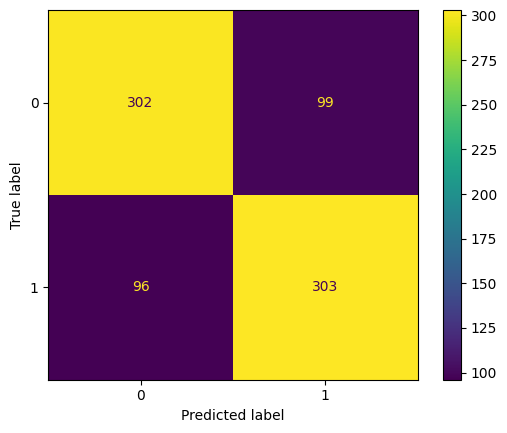

In [ ]:
# codice per la confusion matrix
# Importo le risorse per utilizzare la confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcolo la confusion matrix

cm = confusion_matrix(y_test_apple, y_predict_apple_test_2)

# Disegno la confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regressor.classes_)
disp.plot()

# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

In [ ]:
# training del modello con un decision tree
# Importo le librerie

from sklearn.tree import DecisionTreeClassifier

# Definisco il modello

clf = DecisionTreeClassifier()

# Addestro il modello con i parametri standard

clf.fit(X_train_apple, y_train_apple)

# Effettuo la predizione

y_predict_apple_clf = clf.predict(X_test_apple)

# Stampo il report

print(classification_report(y_test_apple, y_predict_apple_clf))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       401
           1       0.80      0.82      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.80       800
weighted avg       0.81      0.81      0.80       800



E poi alla costruzione della confusion matrix:

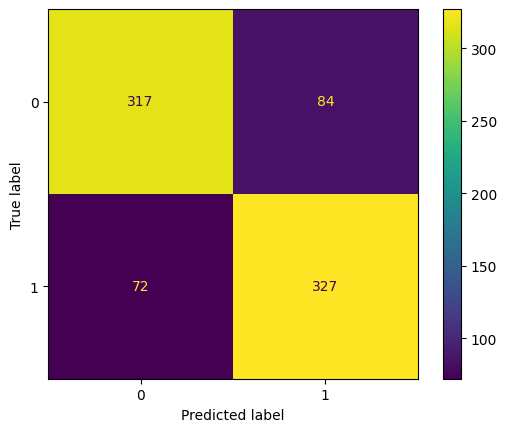

In [ ]:
# confusion matrix del decision tree

cm_clf = confusion_matrix(y_test_apple, y_predict_apple_clf)

# Disegno la confusion matrix

disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_)
disp_clf.plot()

Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

In [ ]:
# codice per la feature importance
# Definisco l'oggetto importance

imp = clf.feature_importances_

# Creo un dataframe per visualizzare le importance

df_imp = pd.DataFrame(imp, index=X_train_apple.columns, columns=['Importance'])

# Ordino in modo decrescente

df_imp = df_imp.sort_values(by='Importance', ascending=False)

print(df_imp)

             Importance
Ripeness       0.208192
Size           0.170329
Sweetness      0.162069
Acidity        0.139648
Juiciness      0.127297
Crunchiness    0.098630
Weight         0.093834


In [ ]:
# Sembra dunque che le variabili con maggior influenza sulla variabile target
# siano la Ripeness, cioè il livello di maturazione della mela, la grandezza
# e la dolcezza della stessa.

# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [ ]:
classification_dataset_2 = classification_dataset.drop(columns=['Quality'])

classification_dataset_2 = classification_dataset_2.drop(columns=['A_id'])

In [ ]:
classification_dataset_2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [ ]:
# codice per trainare il modello con K-Means Clustering
# Importo le librerie

from sklearn.cluster import KMeans

# Richiamo il modello

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto') # Assegno 2 cluster come primo passaggio

# Addestro il modello

kmeans.fit(classification_dataset_2)

KMeans(n_clusters=2, n_init='auto', random_state=42)

Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [ ]:
# codice per effettuare la predizione su una mela dalle caratteristiche a piacere
# Decido di utilizzare la prima mela del dataset

mela = 1

df_pred = classification_dataset_2.iloc[[mela]]

# Effettuo la predizione

prediction_apple = kmeans.predict(df_pred)

# Recupero il dataset originario, contenente la clusterizzazione della mela

df_std = classification_dataset['Quality'].iloc[mela]

# Verifico la predizione

print(f'Il modello ha predetto che la mela in questione è clusterizzata\n'
      f'con il valore {prediction_apple} e la definizione originaria era [{df_std}]')

Il modello ha predetto che la mela in questione è clusterizzata
con il valore [1] e la definizione originaria era [good]


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

In [ ]:
# Richiamo il modello

kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init='auto') # Assegno 2 cluster come primo passaggio

# Addestro il modello

kmeans_3.fit(classification_dataset_2)

# Effettuo la predizione (questa volta su tutto il dataset)

prediction_apple_kmeans_3 = kmeans_3.predict(classification_dataset_2)

# Verifico la predizione

df_originario = classification_dataset['Quality'].copy()
df_predizione = pd.DataFrame(prediction_apple_kmeans_3, columns=['KMeans_quality'])

df_confronto = pd.concat([df_originario, df_predizione], axis=1)

# Stampo il dataset

df_confronto.sample(10)

,Quality,KMeans_quality
3089,good,0
3676,bad,0
300,good,1
2319,good,0
2052,bad,0
2352,good,2
1513,bad,0
474,good,2
2253,bad,1
3814,bad,0


In [ ]:
# Controllo la clusterizzazione

df_conteggio = df_predizione['KMeans_quality'].value_counts()
df_conteggio

,count
KMeans_quality,
0,1503
1,1275
2,1222


# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [ ]:
# codice per costruire un nuovo dataset, partendo da regression_raw_dataset, con solo le colonne "Date" e "gross income"
# Recupero il dataset regression raw e lo copio dentro l'oggetto timeseries_dataset
# inoltre seleziono già all'origine le 2 colonne d'interesse.

timeseries_dataset = regression_raw_dataset[['Date','gross income']].copy()

Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [ ]:
timeseries_dataset.head(100)

,Date,gross income
0,1/5/2019,26.1415
1,3/8/2019,3.8200
2,3/3/2019,16.2155
3,1/27/2019,23.2880
4,2/8/2019,30.2085
...,...,...
95,3/8/2019,4.8580
96,3/29/2019,43.9350
97,2/9/2019,3.7350
98,3/23/2019,7.9125


In [ ]:
timeseries_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   gross income  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


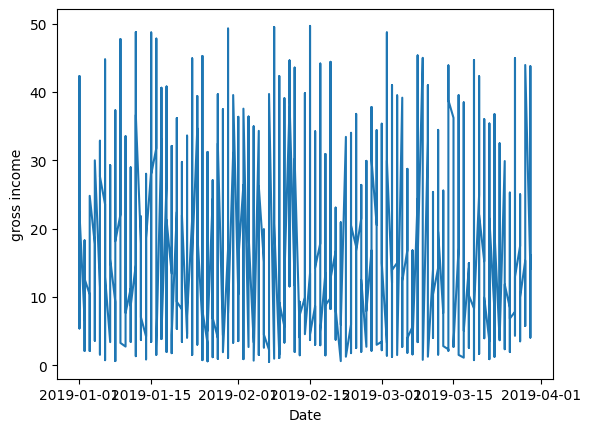

In [ ]:
# Stampo il grafico a linea per visualizzare la serie temporale
# Casto il giorno della transazione come data e ordino in maniera ascendente.

timeseries_dataset['Date'] = timeseries_dataset['Date'].astype('datetime64[ns]')
timeseries_dataset = timeseries_dataset.sort_values('Date', ascending=True)

# Isolo il giorno

timeseries_dataset['Day'] = timeseries_dataset['Date'].dt.isocalendar().day

# Recupero la week

timeseries_dataset['Week'] = timeseries_dataset['Date'].dt.isocalendar().week

# Stampo il grafico

plt.plot(timeseries_dataset['Date'], timeseries_dataset['gross income'])
plt.xlabel('Date')
plt.ylabel('gross income')
plt.show()

In [ ]:
# Sembra che il dataset sia randomico, divido il dataset a metà.

split_point = '2019-02-15'

timeseries_dataset_train = timeseries_dataset[timeseries_dataset['Date'] < split_point].copy()
timeseries_dataset_test = timeseries_dataset[timeseries_dataset['Date'] >= split_point].copy()

X_series_train = timeseries_dataset_train.drop(columns=['gross income','Date'])
y_series_train = timeseries_dataset_train['gross income']

X_series_test = timeseries_dataset_test.drop(columns=['gross income','Date'])
y_series_test = timeseries_dataset_test['gross income']

# Stampo le dimensioni

print(X_series_train.shape, y_series_train.shape, X_series_test.shape, y_series_test.shape)

(510, 2) (510,) (490, 2) (490,)


A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

In [ ]:
# training della time series con la linear regression
# Richiamo il modello

regressor_timeseries = LinearRegression()

# Applico il modello

regressor_timeseries.fit(X_series_train, y_series_train)

LinearRegression()

E vai a controllare le solite metriche, cioè MSE ed MAE:

In [ ]:
# Effettuo la predizione usando i dati di test

y_series_prediction = regressor_timeseries.predict(X_series_test)

# Calcolo l'MSE e il MAE

MSE = mean_squared_error(y_series_test, y_series_prediction)
MAE = mean_absolute_error(y_series_test, y_series_prediction)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 133.15079362598854 
MAE = 9.289485136394111


Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

In [ ]:
# (BONUS) training e performance evalutation della time series con XGBoost

# Importo le librerie

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit

# Importo il dataset

timeseries_dataset_xgb = regression_raw_dataset[['Date','gross income']].copy()

# Definisco una griglia di parametri

param_grid_2 = {
    'n_estimators': [100, 1000],

    # Il parametro n_estimators definisce il numero di alberi di decisione
    # da costruire nel modello.
    # Al crescere del numero degli alberi chiaramente cresce anche il tempo di
    # calcolo stimato.
    # In questo passaggio ho fornito una serie di valori crescenti alla
    # griglia in modo da testare varie configurazioni.

    'learning_rate': [0.1, 0.3],

    # Questo parametro raffina il quanto velocemente il modello si adatta ai
    # suoi residui nei vari step.

    'max_depth': [3, 9],

    # Questo parametro specifica la profondità massima di ogni albero.

    'min_child_weight': [1, 5, 9],

    # Questo parametro definisce la somma minima del peso delle istanze necessaria
    # in un nodo figlio.
    # In breve, al crescere del parametro risulta più complesso per il modello generare
    # nuovi figli, riducendo l'overfitting.

    'reg_alpha': [0, 0.5, 1],

    # Il parametro sulla regolarizzazione Lasso.

    'reg_lambda': [0, 0.5, 1],

    # Il parametro sulla regolarizzazione Ridge.

    'subsample': [0.8, 1],

    # Questo parametro controlla la frazione di istanze che vengono utilizzate per
    # addestrare ogni albero.
    # Con un subsample di 1 vengono usate tutte le istanze, mentre con un
    # subsample <1 vengono addestrate in percentuale a seconda
    # del valore passato.

    'colsample_bytree': [0.8, 1.0]

    # Questo parametro è simile al subsample ma invece che impattare sulle
    # istanze impatta sulle feature. A 1 sfrutta tutte le feature mentre
    # per x < 1 ne sfrutta in percentuale a seconda del parametro.

}

# Richiamo il modello

regressor_timeseries_xgb = xgb.XGBRegressor(tree_method='hist',
                                            device='cuda'

                                            # Utilizzo la GPU di Google Colab
                                            # (già impostata a livello di setting)
                                            # con il metodo dell'albero hist.

                                            )

grid_search = GridSearchCV(estimator=regressor_timeseries_xgb, param_grid=param_grid_2,
                           scoring='neg_mean_squared_error', verbose=1)

# Addestro il modello sui dati di train

grid_search.fit(X_series_train, y_series_train)

# Seleziono il modello

best_xgbr_model = grid_search.best_estimator_

# Recupero i parametri

best_params = grid_search.best_params_

print(f'{best_xgbr_model}, \n {best_params}')

# Previsione

y_series_pred = best_xgbr_model.predict(X_series_test)

# Valutazione delle previsioni

MAE_xgbr = mean_absolute_error(y_series_test, y_series_pred)
MSE_xgbr = mean_squared_error(y_series_test, y_series_pred)

print(f'MAE = {MAE_xgbr}')
print(f'MSE = {MSE_xgbr}')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), 
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1}
MAE = 9.543941485798115
MSE = 134.53

In [ ]:
# In termini di MAE e MSE il modello XGBR performa peggio della regressione lineare.
# Probabilmente la riduzione dei parametri (annessi i ridotti range di scelta) inficia sul modello.